In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats
import statistics 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn

In [2]:
#setting working directory
os.chdir("/Users/alfazalm/Documents/bike_rent/bikerent")

In [3]:
#loading csv file
day = pd.read_csv("day.csv")

In [4]:
#Taking some samples of data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Variables
print(day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Missing Value Analysis


In [6]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no missing value

Outlier Analysis

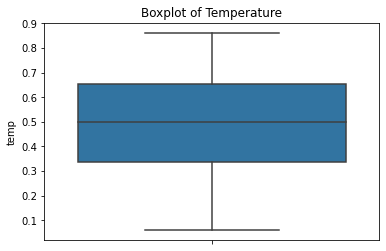

In [7]:
sns.boxplot(y = day['temp'])
plt.title("Boxplot of Temperature")
plt.show()

There is no outlier in Temperature

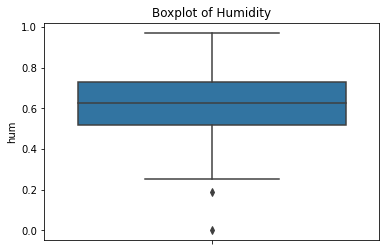

In [8]:
sns.boxplot(y = day['hum'])
plt.title("Boxplot of Humidity")
plt.show()

There are outliers in Humidity

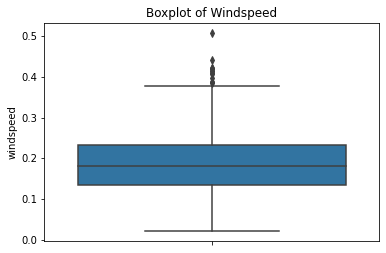

In [9]:
sns.boxplot(y = day['windspeed'])
plt.title("Boxplot of Windspeed")
plt.show()

There are outliers in windspeed

Removing Outliers in Humidity and windspeed

In [10]:
q25h=np.percentile(day['hum'],25)
q75h = np.percentile(day['hum'],75)
iqh= q75h-q25h
innerfh = q25h - (iqh*1.5)
upperfh = q75h + (iqh*1.5)
print(innerfh)
print(upperfh)
print(iqh)


0.20468725
1.0455212500000002
0.21020850000000002


Innerfence for Humidity = 0.20468725
 Upperfence for humidity = 1.0455212500000002
 IQR for Humidity = 0.21020850000000002

In [11]:
day2=day
day2.loc[day['hum']<innerfh, 'hum'] = np.nan
day2.loc[day['hum']>upperfh, 'hum'] = np.nan

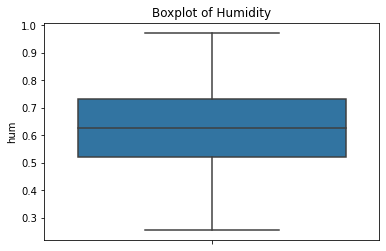

In [12]:
sns.boxplot(y = day2['hum'])
plt.title("Boxplot of Humidity")
plt.show()

Outliers in Humidity are removed

In [13]:
q25w=np.percentile(day['windspeed'],25)
q75w = np.percentile(day['windspeed'],75)
iqw= q75w-q25w
innerfw = q25w - (iqw*1.5)
upperfw = q75w + (iqw*1.5)
print(innerfw)
print(upperfw)
print(iqw)

-0.012446750000000034
0.38061125
0.0982645


Innerfence for Windspeed = -0.012446750000000034 Upperfence for Windspeed = 0.38061125 IQR for Windspeed = 0.0982645

In [14]:
day2.loc[day['windspeed']<innerfw, 'windspeed'] = np.nan
day2.loc[day['windspeed']>upperfw, 'windspeed'] = np.nan

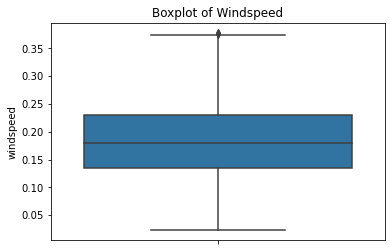

In [15]:
sns.boxplot(y = day2['windspeed'])
plt.title("Boxplot of Windspeed")
plt.show()

Outliers in windspeed are removed

In [16]:
day2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day2.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
dtype: int64

In [18]:
#imputing NA values with mean
day3=day2
meanh= day3["hum"].mean()
meanw= day3["windspeed"].mean()
day3['hum'] = day3['hum'].fillna(meanh)
day3['windspeed'] = day3['windspeed'].fillna(meanw)



In [19]:
day3.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Feature Selection

In [20]:
#collinearity checking with numeric variables
numeric = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation = day3.loc[:, numeric].corr()
print(correlation)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123703  -0.140000  0.627494
atemp      0.991702  1.000000  0.137293  -0.165315  0.631066
hum        0.123703  0.137293  1.000000  -0.201894 -0.121518
windspeed -0.140000 -0.165315 -0.201894   1.000000 -0.216473
cnt        0.627494  0.631066 -0.121518  -0.216473  1.000000


temp and atemp variables are highly correlated(0.991702)

In [21]:
#anova test for categorical variables
categ = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in categ:
    fit2 = ols('cnt' + '~' + i, data = day3).fit()
    anova = sm.stats.anova_lm(fit2, typ = 2)
    print(anova)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

Holiday,Weekday and Working day has p value greater than 0.05 in anova test

in collinearity checking temp and atemp is highly correlated atemp can be removed for dimension reduction
Also in anova test Holiday,weekday and working day has p value greater than 0.05 so these variables also can be removed

In [22]:
day4 = day3
day4=day4.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")

For dimension reduction###########################################################################################
cnt are not dependant on instant,dteday variables and cnt is sum of casual and registered these variables also can be removed(instant,dteday,casual,registered)


In [23]:
day4=day4.drop(['instant', 'dteday', 'casual', 'registered'], axis = "columns")

In [24]:
day4.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
0,1,0,1,2,0.344167,0.805833,0.160446,985
1,1,0,1,2,0.363478,0.696087,0.248539,801
2,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,1,0.226957,0.436957,0.186900,1600


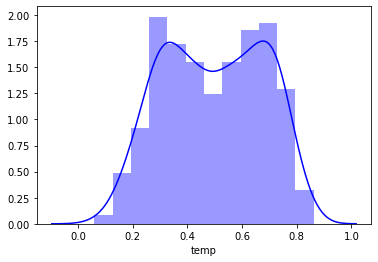

In [25]:
sns.distplot(day4['temp'], bins = 'auto', color = 'blue')
plt.show()

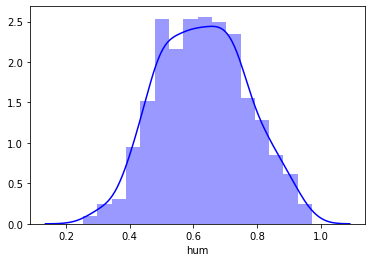

In [26]:
sns.distplot(day4['hum'], bins = 'auto', color = 'blue')
plt.show()

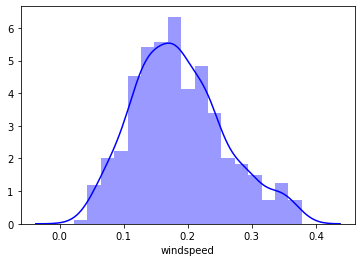

In [27]:
sns.distplot(day4['windspeed'], bins = 'auto', color = 'blue')
plt.show()

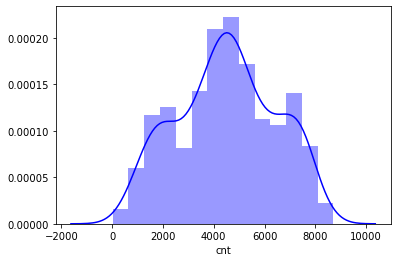

In [28]:
sns.distplot(day4['cnt'], bins = 'auto', color = 'blue')
plt.show()

All numeric variables are symmetric

In [29]:
day4.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629359,0.186392,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071149,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.629167,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


Variables are normalized no need of feature scaling

Modeling

In [30]:
#Decision Tree
#creating dummy variables for Categorical Variables
categ = ['season','yr','mnth','weathersit']
day5 = pd.get_dummies(day4, columns = categ) 
day5.head()
day5.shape

(731, 25)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr 
variables=day5.drop(['cnt'], axis = "columns")
train_var, test_var, train_cnt, test_cnt = train_test_split(variables, day['cnt'], test_size=.20, random_state=0)

In [32]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=2).fit(train_var,train_cnt)

In [33]:
#Prediction
test_dt = model_dt.predict(test_var)

In [34]:
MAPE_DT = np.mean(np.abs(test_cnt-test_dt)/test_cnt)*100

In [35]:
MAPE_DT

36.94809301452646

In [36]:
rsquare_dt= np.corrcoef(test_cnt,test_dt)**2

In [37]:
print(str(rsquare_dt))

[[1.         0.65446069]
 [0.65446069 1.        ]]


In [38]:
rsquare_dt1 = rsquare_dt.ravel()

rsqr_dt = float(rsquare_dt1[1])

In [39]:
rsqr_dt

0.6544606873373333

Decision Tree Summary

MAPE = 36.94809301452646

Rsquare = 0.6544606873373333

Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=500).fit(train_var,train_cnt)

In [41]:
#predictions
test_rf = model_rf.predict(test_var)

In [42]:
MAPE_RF = np.mean(np.abs(test_cnt-test_rf)/test_cnt)*100

In [43]:
MAPE_RF

20.941556127697257

In [44]:
rsquare_rf= np.corrcoef(test_cnt,test_rf)**2

In [45]:
rsquare_rf1 = rsquare_rf.ravel()

rsqr_rf = float(rsquare_rf1[1])

In [46]:
rsqr_rf

0.884011372851943

Random Forest Summary

MAPE = 20.668671141459097

R Square = 0.8871298270927973

Linear Regression

In [47]:
import statsmodels.api as lr
model_lr= lr.OLS(train_cnt,train_var).fit()

In [48]:
#Predictions

test_lr = model_lr.predict(test_var)

In [49]:
MAPE_LR = np.mean(np.abs(test_cnt-test_lr)/test_cnt)*100

In [50]:
MAPE_LR 

18.783428096440577

In [51]:
rsquare_lr= np.corrcoef(test_cnt,test_lr)**2

In [52]:
rsquare_lr1 = rsquare_lr.ravel()

rsqr_lr = float(rsquare_lr1[1])

In [53]:
rsqr_lr

0.8436859345476398

Linear Regression Summary

MAPE = 18.783428096440577

R Square = 0.8436859345476398

Random Forest is the best method because MAPE is less and R Square is higher (In linear regression MAPE is only slightly lower but R Square value is less compared to Random Forest), We are using Random Forest for input and output example

Sample Input and Output

x is the sample input

x= ("season"=1,"yr"=0,"mnth"=2,"weathersit"=2,"temp"=0.173,"hum"=0.796,"windspeed"=0.1323,"cnt"=NA)

In [54]:
day6=day4
day6.loc[len(day6.index)] = [1, 0, 2,2,0.173,0.796,0.1323,'NA'] 

In [55]:
day6 = pd.get_dummies(day6, columns = categ) 

In [56]:
x = day6.loc[:,day6.columns != 'cnt']

In [57]:
output = model_rf.predict(x)

In [58]:
output

array([1435.346, 1739.79 , 1380.586, 1508.216, 1554.616, 1586.684,
       1483.878, 1061.512, 1284.56 , 1281.1  ,  854.972, 1217.052,
       1347.618, 1387.664, 1520.688, 1374.39 , 1115.428,  770.868,
       1519.69 , 1768.192, 1462.232, 1098.244, 1088.66 , 1329.104,
       1809.166,  679.476,  770.146,  916.654, 1133.982, 1019.972,
       1435.58 , 1214.102, 1573.486, 1560.848, 1722.276, 1133.558,
       1756.468, 1833.2  , 1533.33 , 1526.22 , 1484.688, 1726.462,
       1539.414, 1732.022, 2081.938, 1833.76 , 1986.86 , 2658.018,
       4652.504, 2101.622, 1917.262, 1340.348, 1538.356, 1843.04 ,
       1748.872, 1808.272, 1865.164, 2354.174, 1676.072, 1877.682,
       2142.382, 1665.098, 1931.53 , 2137.96 , 1684.142, 1829.106,
       2182.508, 1878.118, 2210.884, 1973.67 , 2112.062, 2364.526,
       2204.418, 1999.576, 2187.71 , 2311.146, 4371.338, 3590.934,
       2316.968, 2419.46 , 2929.37 , 2050.924, 1891.458, 2196.762,
       2363.176, 2101.812, 2151.746, 2300.6  , 1820.678, 1638.

In [59]:
len(day6)

732

In [1]:
output[len(day6)-1]

NameError: name 'output' is not defined

In [58]:
model_dt